<a href="https://colab.research.google.com/github/Pugianf/ANTAQ/blob/main/ANTAQ_An%C3%A1lise_IDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise IDA para Portos e TUPs

In [3]:
# installing librarys

!pip install tabula-py
from IPython.display import clear_output
clear_output()

In [127]:
# importing

import numpy as np
import pandas as pd
import tabula
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [5]:
# connecting drive

from google.colab import drive
drive.mount('/content/drive')
clear_output()

### Portos Database

In [21]:
# creating an empty DataFrame for 'Portos'

df_portos = pd.DataFrame()

In [22]:
# list of IDA years

IDA_years = [2015, 2016, 2017, 2018, 2019, 2020]

In [23]:
# looping the original data and adding to df_portos

for count, value in enumerate(IDA_years):
  file = f'/content/drive/MyDrive/ANTAQ/Datasets/IDA/Portos/RelRankingIDA_{count}.pdf'
  table = tabula.read_pdf(file,pages='all')
  final_table = pd.concat(table)
  final_table['Ano'] = value
  final_table.drop(columns='Instalação', inplace=True)
  final_frame = [df_portos, final_table]
  df_portos = pd.concat(final_frame)

In [24]:
# setting 'Ano' as index

df_portos.set_index('Ano', inplace=True)

In [25]:
# renaming colomns

df_portos.rename(columns={'Unnamed: 0':'Porto'}, inplace=True)

In [26]:
# wrangling IDA colomn and casting to float

df_portos['IDA'] = df_portos['IDA'].apply(lambda x: x.replace(',','.'))

df_portos['IDA'] = pd.to_numeric(df_portos['IDA'])

In [27]:
# Data for Portos - IDA graphic

mean_IDA_portos = pd.DataFrame(df_portos.groupby('Ano')['IDA'].mean().round(2))

In [85]:
# checking NaN values

df_portos.isnull().values.any()

False

In [44]:
# saving the dataframe

df_portos.to_csv('/content/drive/MyDrive/ANTAQ/Datasets/IDA/Portos/Portos.csv')

### TUP's Database

In [68]:
# creating an empty DataFrame for 'TUPs'

df_TUP = pd.DataFrame()

In [69]:
# looping the original data and adding to df_TUP

for count, value in enumerate(IDA_years):
  file = f'/content/drive/MyDrive/ANTAQ/Datasets/IDA/TUP/RelRankingIDA_{count}.pdf'
  table_TUP = tabula.read_pdf(file,pages='all')
  final_table_TUP = pd.concat(table_TUP)
  final_table_TUP['Ano'] = value
  final_frame_TUP = [df_TUP, final_table_TUP]
  df_TUP = pd.concat(final_frame_TUP)

In [72]:
# replacing 'Instalacão' with NaN value

df_TUP['TUP'] = np.where(df_TUP['Instalação'].isnull(), df_TUP['Unnamed: 0'], df_TUP['Instalação'])

In [76]:
# dropping 'Unnamed :0'

df_TUP.drop(columns=['Unnamed: 0', 'Instalação'], inplace=True)

In [77]:
# setting 'Ano' as index

df_TUP.set_index('Ano', inplace=True)

In [90]:
# wrangling IDA colomn and casting to float

df_TUP['IDA'] = df_TUP['IDA'].apply(lambda x: x.replace(',','.'))

df_TUP['IDA'] = pd.to_numeric(df_TUP['IDA'])

In [91]:
# Data for TUP's - IDA graphic

mean_IDA_TUP = pd.DataFrame(df_TUP.groupby('Ano')['IDA'].mean().round(2))

In [175]:
# saving the dataframe

df_TUP.to_csv('/content/drive/MyDrive/ANTAQ/Datasets/IDA/TUP/TUP.csv')

In [93]:
# checking NaN values

df_TUP.isnull().values.any()

False

### Graphics

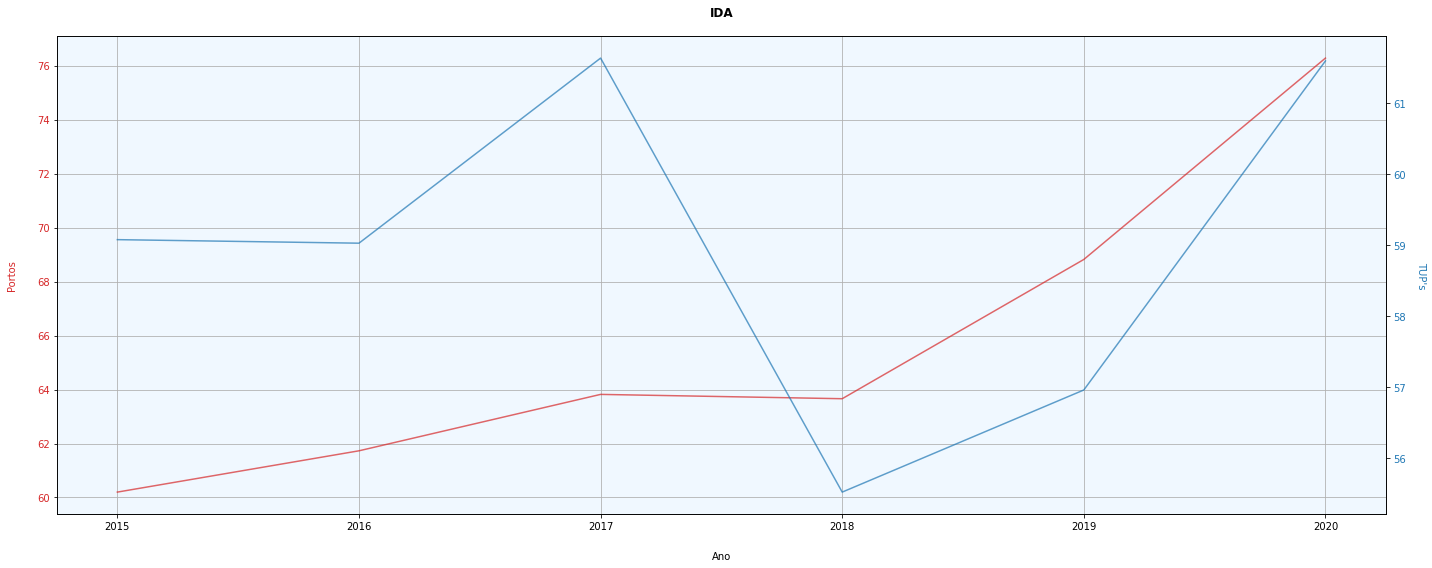

In [184]:
# Generic graphic over IDA

x = IDA_years
y = mean_IDA_portos
z = mean_IDA_TUP

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_facecolor("AliceBlue")
plt.grid()

color = 'tab:red'
ax1.set_xlabel('Ano', labelpad=20)
ax1.set_ylabel('Portos', labelpad=20, color=color)
ax1.plot(x, y, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('TUP\'s', rotation=270, labelpad=20, color=color)
ax2.plot(x, z, color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('IDA', pad=20, fontweight='bold')

fig.tight_layout()

plt.show()

In [138]:
# special studies

count_TUP_part = pd.DataFrame(df_TUP.groupby('TUP')['IDA'].count()).sort_values('IDA', ascending=False)

In [137]:
# checking how many TUP's had been on IDA

len(set(count_TUP_part.index))

127

In [132]:
# had participate > 5

len(count_TUP_part[count_TUP_part.IDA > 5])

53

In [134]:
# had participate > 4

len(count_TUP_part[count_TUP_part.IDA > 4])

78

In [135]:
# had participate > 3

len(count_TUP_part[count_TUP_part.IDA > 3])

88

In [170]:
# creating a dictionary with number of participations

dictionaryObject = df_TUP.groupby('TUP').count().drop(columns='Posição').to_dict()

dictionaryObject = dictionaryObject.values()

participations = {'AIVEL': 4, 'ATEM Manaus': 2, 'ATEM PVH': 2, 'Barra do Rio Terminal Portuário': 1, 'Base Ipiranga Santarém': 1, 'Base Logística de Dutos': 1, 'Belmont': 5, 'Bertolini - Belém': 5, 'Bertolini - Santarém': 6, 'Bianchini Canoas': 6, 'Brasco Logística Offshore': 6, 'Brasco Rio': 2, 'Brasil Logística Offshore e Estaleiro Naval': 1, 'CMPC Guaíba': 6, 'Caramuru Alimentos São Simão': 5, 'Cargill Agrícola': 4, 'Carinhoso': 3, 'Cattalini Terminais Marítimos': 6, 'Chibatão Navegação e Comércio': 6, 'Cimento Vencemos': 6, 'Companhia Portuária Vila Velha - CPVV': 3, 'Cosan Lubrificantes e Especialidades': 5, 'DP World Santos': 6, 'Estaleiro Atlântico Sul - EAS': 3, 'Estaleiro Brasfels': 2, 'Estaleiro Jurong': 2, 'Flexibrás Açu': 2, 'Gerdau Aços Longos': 6, 'Granel Química Ladário': 6, 'Ibepar': 6, 'Itaituba Indústria de Cimentos': 1, 'J. F. de Oliveira - Manaus': 6, 'Mac Laren Estaleiros': 1, 'Moinho Taquariense': 2, 'Moss': 6, 'Ocrim': 6, 'Oleoplan': 6, 'Passarão': 5, 'Poly Terminais Portuários': 2, 'Porto CPA': 1, 'Porto CRA': 5, 'Porto Chibatão': 6, 'Porto Crai': 4, 'Porto Engenheiro Zephyrino Lavanère Machado Filho': 1, 'Porto Gregório Curvo': 5, 'Porto Itapoá Terminais Portuários': 6, 'Porto Jari - Terminal Munguba': 3, 'Porto Murucupi': 4, 'Porto Sudeste do Brasil': 5, 'Porto do Açu - Terminal TMULT e TCAR': 3, 'Porto do Açu - Terminal de Minério': 5, 'Portocel - Terminal Especializado de Barra do Riacho': 6, 'Portonave - Terminais Portuários de Navegantes': 6, 'Sucocítrico Cutrale': 6, 'Super Terminais Comércio e Indústria': 6, 'Supergasbrás': 1, 'TERFRON': 5, 'TERNIUM BR': 5, 'TMB - Terminal Marítimo de Belmonte': 5, 'TUP Intermoor - Base de Apoio Marítimo Intermoor Açú': 1, 'TUP Zemax': 1, 'Teporti': 4, 'Terbian - Terminal Bianchini': 6, 'Terminais Fluviais do Brasil': 4, 'Terminal Aquaviário Solimões - Coari': 6, "Terminal Aquaviário da Ilha D'Água": 6, 'Terminal Aquaviário de Angra dos Reis': 6, 'Terminal Aquaviário de Aracaju': 6, 'Terminal Aquaviário de Barra do Riacho': 5, 'Terminal Aquaviário de Guamaré': 6, 'Terminal Aquaviário de Ilha Redonda e Terminal Aquaviário da Ilha Comprida': 5, 'Terminal Aquaviário de Madre de Deus': 6, 'Terminal Aquaviário de Manaus': 6, 'Terminal Aquaviário de Niterói': 6, 'Terminal Aquaviário de Osório': 6, 'Terminal Aquaviário de São Francisco do Sul': 6, 'Terminal Aquaviário de São Sebastião (Almirante Barroso)': 6, 'Terminal Aquaviário do Norte Capixaba': 6, 'Terminal Braskem': 5, 'Terminal CCPN': 3, 'Terminal Estaleiro Mauá': 2, 'Terminal Flexível de GNL da Baía da Guanabara': 3, 'Terminal Fluvial Caulim': 6, 'Terminal Fluvial de Juruti': 6, 'Terminal Fogás': 6, 'Terminal Graneleiro Hermasa': 5, 'Terminal Hidroviário Cimbagé': 1, 'Terminal Ilha do Governador': 3, 'Terminal Integrador Portuário Luiz Antonio Mesquita - TIPLAM': 5, 'Terminal J. F. de Oliveira de Belém': 4, 'Terminal Marítimo Alfandegado Privativo de Uso Misto de Praia Mole': 5, 'Terminal Marítimo Braskem': 5, 'Terminal Marítimo Dow': 6, 'Terminal Marítimo Dow Aratu - Bahia': 6, 'Terminal Marítimo Inácio Barbosa - TMIB': 4, 'Terminal Marítimo Luiz Fogliatto - Termasa': 6, 'Terminal Marítimo Miguel de Oliveira': 5, 'Terminal Marítimo Ponta Ubu': 6, 'Terminal Marítimo Ponte do Thun': 6, 'Terminal Marítimo Privativo de Cubatão - TMPC': 5, 'Terminal Marítimo de Ponta da Madeira': 6, 'Terminal Navecunha': 1, 'Terminal Nov Flexibles': 1, 'Terminal Ponta da Montanha': 5, 'Terminal Portuário Braskarne': 6, 'Terminal Portuário Bunge Alimentos': 5, 'Terminal Portuário Cotegipe': 6, 'Terminal Portuário Privativo da Alumar': 6, 'Terminal Portuário Wellstream - TPW': 1, 'Terminal Portuário da Glória - TPG': 1, 'Terminal Privado Copelmi': 6, 'Terminal Sanave de Manaus': 2, 'Terminal Santa Clara': 3, 'Terminal Trombetas': 5, 'Terminal Vila do Conde': 4, 'Terminal da Ilha Guaíba - TIG': 6, 'Terminal de Barcaças Luciano Villas Boas Machado': 5, 'Terminal de Barcaças Oceânicas': 6, 'Terminal de Expedição de Grãos Portochuelo': 4, 'Terminal de Gás do Sul - Tergasul': 2, 'Terminal de Praia Mole': 6, 'Terminal de Regaiseficação de GNL da Bahia - TRBA': 6, 'Terminal de Tubarão': 6, 'Trocadeiro': 2, 'UTC Engenharia': 1, 'Unidade Offshore Techint - UOT': 1, 'Yara Brasil Fertilizantes': 6}

In [171]:
# creating 'Participações' column

df_TUP['Participações'] = df_TUP['TUP']

In [174]:
# applying participations dict to 'Participações' column

df_TUP.replace({'Participações': participations}, inplace=True)

In [177]:
# mean for TUP with at least 6 participations

mean_IDA_TUP_6 = pd.DataFrame(df_TUP[df_TUP['Participações'] > 5].groupby('Ano')['IDA'].mean().round(2))

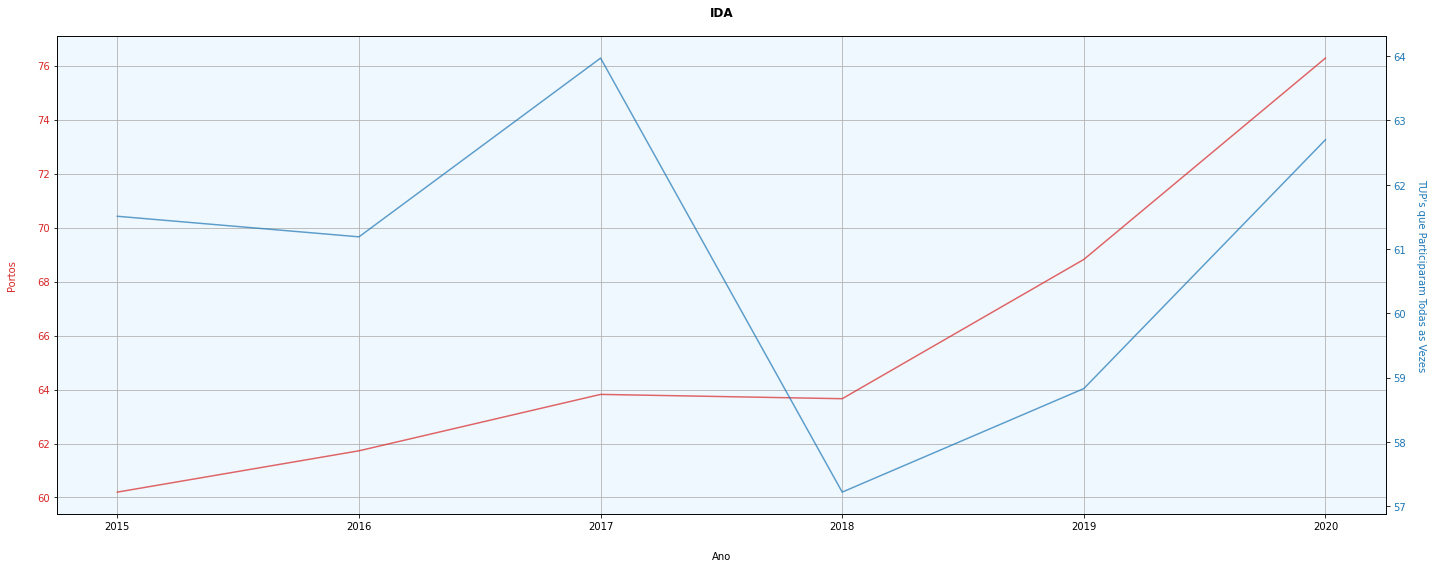

In [187]:
# graphic Portos x Tup's > 6

x = IDA_years
y = mean_IDA_portos
z = mean_IDA_TUP_6

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_facecolor("AliceBlue")
plt.grid()

color = 'tab:red'
ax1.set_xlabel('Ano', labelpad=20)
ax1.set_ylabel('Portos', labelpad=20, color=color)
ax1.plot(x, y, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('TUP\'s que Participaram Todas as Vezes', rotation=270, labelpad=20, color=color)
ax2.plot(x, z, color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('IDA', pad=20, fontweight='bold')

fig.tight_layout()

plt.show()

In [189]:
# mean for TUP with each specific number of participations

mean_IDA_TUP_6 = pd.DataFrame(df_TUP[df_TUP['Participações'] == 6].groupby('Ano')['IDA'].mean().round(2))

mean_IDA_TUP_5 = pd.DataFrame(df_TUP[df_TUP['Participações'] == 5].groupby('Ano')['IDA'].mean().round(2))

mean_IDA_TUP_4 = pd.DataFrame(df_TUP[df_TUP['Participações'] == 4].groupby('Ano')['IDA'].mean().round(2))

mean_IDA_TUP_3 = pd.DataFrame(df_TUP[df_TUP['Participações'] == 3].groupby('Ano')['IDA'].mean().round(2))

mean_IDA_TUP_2 = pd.DataFrame(df_TUP[df_TUP['Participações'] == 2].groupby('Ano')['IDA'].mean().round(2))

mean_IDA_TUP_1 = pd.DataFrame(df_TUP[df_TUP['Participações'] == 1].groupby('Ano')['IDA'].mean().round(2))

Text(0.5, 1.0, "Comparação entre TUP's com diferentes participações")

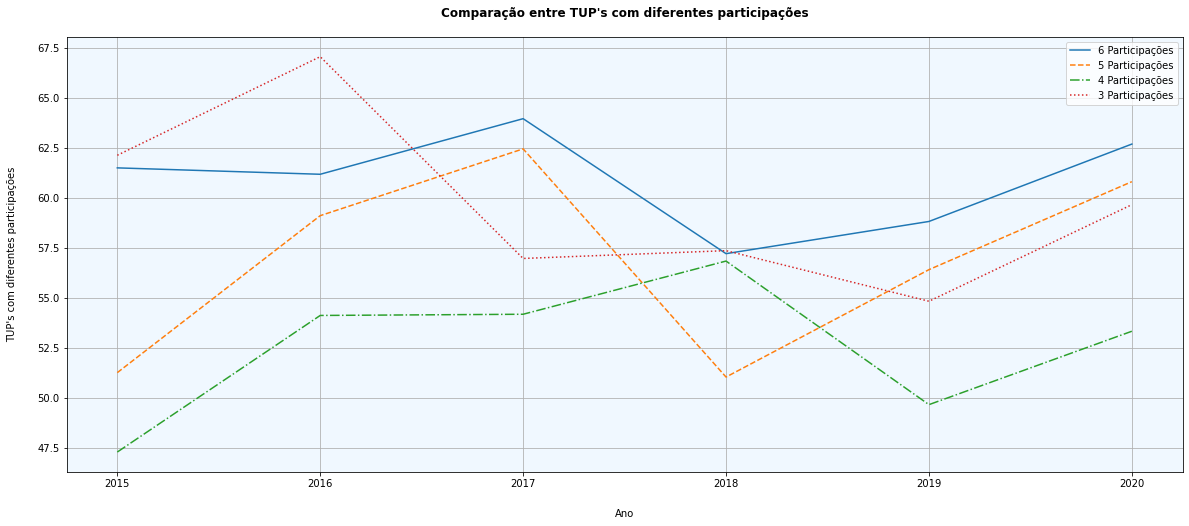

In [202]:
# graph for means and number of participations

x = IDA_years
y = mean_IDA_TUP

fig, ax1 = plt.subplots(figsize=(20,8))

ax1.set_facecolor("AliceBlue")
plt.grid()

plt.plot(x, mean_IDA_TUP_6, label = "6 Participações", linestyle="-")
plt.plot(x, mean_IDA_TUP_5, label = "5 Participações", linestyle="--")
plt.plot(x, mean_IDA_TUP_4, label = "4 Participações", linestyle="-.")
plt.plot(x, mean_IDA_TUP_3, label = "3 Participações", linestyle=":")

ax1.set_xlabel('Ano', labelpad=20)
ax1.set_ylabel('TUP\'s com diferentes participações', labelpad=20, color='black')

plt.legend()

plt.title('Comparação entre TUP\'s com diferentes participações', pad=20, fontweight='bold')

### Testes

In [210]:
df_TUP[df_TUP['Participações'] == 6]

,Posição,IDA,TUP,Participações
Ano,,,,
2015,1,98.95,Portonave - Terminais Portuários de Navegantes,6
2015,2,91.54,Porto Itapoá Terminais Portuários,6
2015,3,90.84,Terminal de Praia Mole,6
2015,4,88.06,Terminal de Tubarão,6
2015,5,85.84,Terminal Portuário Privativo da Alumar,6
...,...,...,...,...
2020,83,35.19,Terminal Aquaviário Solimões - Coari,6
2020,84,31.23,Ibepar,6
2020,85,29.33,Oleoplan,6


In [230]:
df_TUP_6_pivot = pd.pivot_table(df_TUP[df_TUP['Participações'] == 6], values='IDA', index=['Ano'], columns=['TUP'])

df_TUP_6_pivot

TUP,Bertolini - Santarém,Bianchini Canoas,Brasco Logística Offshore,CMPC Guaíba,Cattalini Terminais Marítimos,Chibatão Navegação e Comércio,Cimento Vencemos,DP World Santos,Gerdau Aços Longos,Granel Química Ladário,Ibepar,J. F. de Oliveira - Manaus,Moss,Ocrim,Oleoplan,Porto Chibatão,Porto Itapoá Terminais Portuários,Portocel - Terminal Especializado de Barra do Riacho,Portonave - Terminais Portuários de Navegantes,Sucocítrico Cutrale,Super Terminais Comércio e Indústria,Terbian - Terminal Bianchini,Terminal Aquaviário Solimões - Coari,Terminal Aquaviário da Ilha D'Água,Terminal Aquaviário de Angra dos Reis,Terminal Aquaviário de Aracaju,Terminal Aquaviário de Guamaré,Terminal Aquaviário de Madre de Deus,Terminal Aquaviário de Manaus,Terminal Aquaviário de Niterói,Terminal Aquaviário de Osório,Terminal Aquaviário de São Francisco do Sul,Terminal Aquaviário de São Sebastião (Almirante Barroso),Terminal Aquaviário do Norte Capixaba,Terminal Fluvial Caulim,Terminal Fluvial de Juruti,Terminal Fogás,Terminal Marítimo Dow,Terminal Marítimo Dow Aratu - Bahia,Terminal Marítimo Luiz Fogliatto - Termasa,Terminal Marítimo Ponta Ubu,Terminal Marítimo Ponte do Thun,Terminal Marítimo de Ponta da Madeira,Terminal Portuário Braskarne,Terminal Portuário Cotegipe,Terminal Portuário Privativo da Alumar,Terminal Privado Copelmi,Terminal da Ilha Guaíba - TIG,Terminal de Barcaças Oceânicas,Terminal de Praia Mole,Terminal de Regaiseficação de GNL da Bahia - TRBA,Terminal de Tubarão,Yara Brasil Fertilizantes
Ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,27.11,15.14,68.16,70.64,82.71,55.81,28.94,81.51,40.27,62.64,32.63,51.57,35.88,24.05,54.98,55.25,91.54,70.12,98.95,53.07,68.14,43.68,56.18,68.97,50.79,64.82,60.92,82.23,54.00,58.11,57.84,57.72,77.69,64.72,43.30,68.71,61.77,80.73,74.33,52.35,64.93,65.04,81.95,58.55,49.90,85.84,62.41,66.34,57.72,90.84,74.05,88.06,66.52
2016,27.83,20.97,59.28,74.29,82.59,53.16,29.86,82.25,46.64,63.19,32.63,48.10,31.74,24.05,54.98,53.16,86.08,60.67,95.54,75.93,87.79,47.51,59.90,71.58,63.39,67.70,69.93,73.30,55.05,60.17,60.35,63.30,77.84,72.64,50.12,67.88,55.65,75.99,42.77,52.11,58.94,62.18,81.71,55.62,50.10,67.83,61.45,84.43,47.15,72.45,81.17,72.45,69.62
2017,43.41,39.95,73.45,69.34,87.90,53.61,35.90,84.05,57.08,63.19,40.42,49.49,44.44,30.57,54.98,50.49,61.25,57.26,77.87,76.57,89.09,47.51,57.16,74.35,59.74,73.32,69.93,80.98,57.83,58.85,57.57,60.36,88.39,63.39,54.40,74.34,60.61,82.29,58.36,59.11,81.38,66.76,79.42,56.87,48.46,85.48,59.58,62.54,61.95,83.35,77.77,83.35,64.94
2018,37.56,33.70,77.47,41.00,84.24,44.06,26.53,75.92,40.10,72.15,27.77,48.74,26.66,28.85,34.57,45.36,84.16,73.24,87.84,68.02,60.06,43.02,47.55,58.37,64.87,71.00,59.70,75.32,32.63,47.45,57.76,36.03,86.57,57.41,56.10,70.36,52.15,66.40,55.58,64.86,44.19,48.24,91.79,51.45,50.54,76.55,47.75,87.34,55.42,76.32,58.62,76.32,47.01
2019,36.91,41.62,77.47,55.16,87.27,51.17,51.22,71.85,35.95,54.49,28.03,36.87,24.53,28.52,33.79,41.19,99.26,81.95,89.31,68.48,77.95,46.21,49.95,74.16,62.17,54.73,54.50,59.91,45.35,58.58,53.51,41.14,74.89,52.52,57.49,68.81,40.66,65.01,53.88,75.75,43.94,61.31,98.13,69.71,46.39,78.92,40.11,82.94,53.18,80.91,68.31,80.91,51.27
2020,45.40,40.41,77.18,41.02,93.64,44.29,68.11,75.84,48.60,60.20,31.23,52.35,26.91,25.96,29.33,44.04,98.00,83.57,96.26,68.51,59.98,45.32,35.19,74.46,79.61,59.41,58.59,76.06,45.06,59.09,39.90,60.97,78.05,66.36,53.74,67.55,40.07,80.23,68.13,75.45,80.23,66.65,99.37,74.95,47.58,90.24,37.50,91.56,50.17,86.94,74.76,89.72,59.56


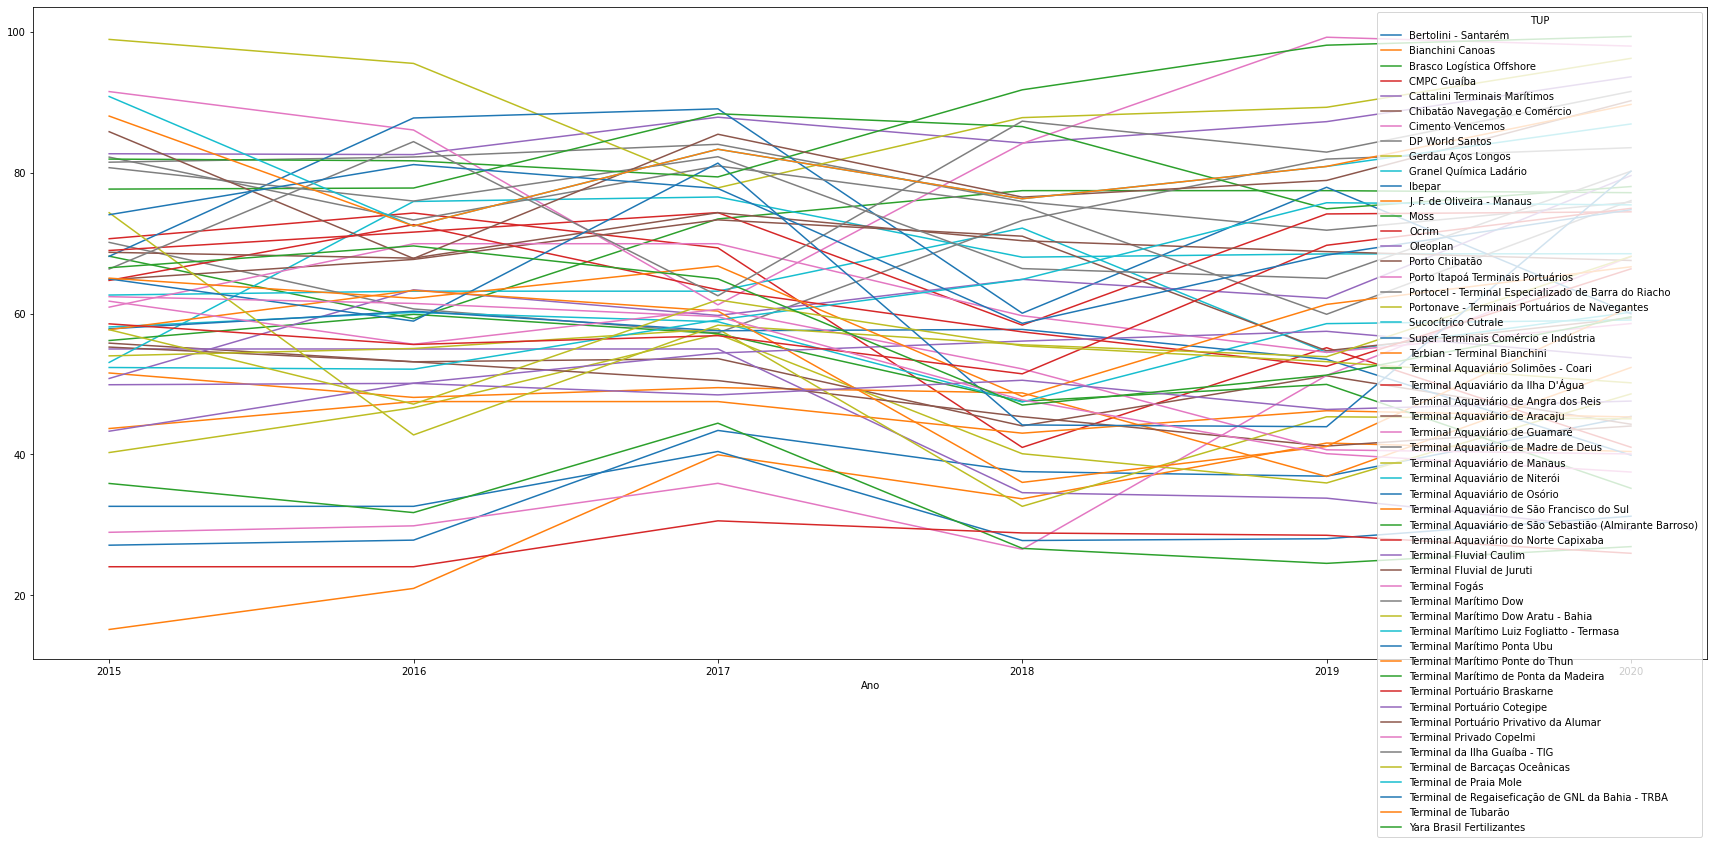

In [234]:
df_TUP_6_pivot.plot(figsize=(30, 12))

In [242]:
df_TUP_6_pivot.iloc[[0,1,2,3,4,5], [0,1,2,3,4,5]]

TUP,Bertolini - Santarém,Bianchini Canoas,Brasco Logística Offshore,CMPC Guaíba,Cattalini Terminais Marítimos,Chibatão Navegação e Comércio
Ano,,,,,,
2015,27.11,15.14,68.16,70.64,82.71,55.81
2016,27.83,20.97,59.28,74.29,82.59,53.16
2017,43.41,39.95,73.45,69.34,87.90,53.61
2018,37.56,33.70,77.47,41.00,84.24,44.06
2019,36.91,41.62,77.47,55.16,87.27,51.17
2020,45.40,40.41,77.18,41.02,93.64,44.29


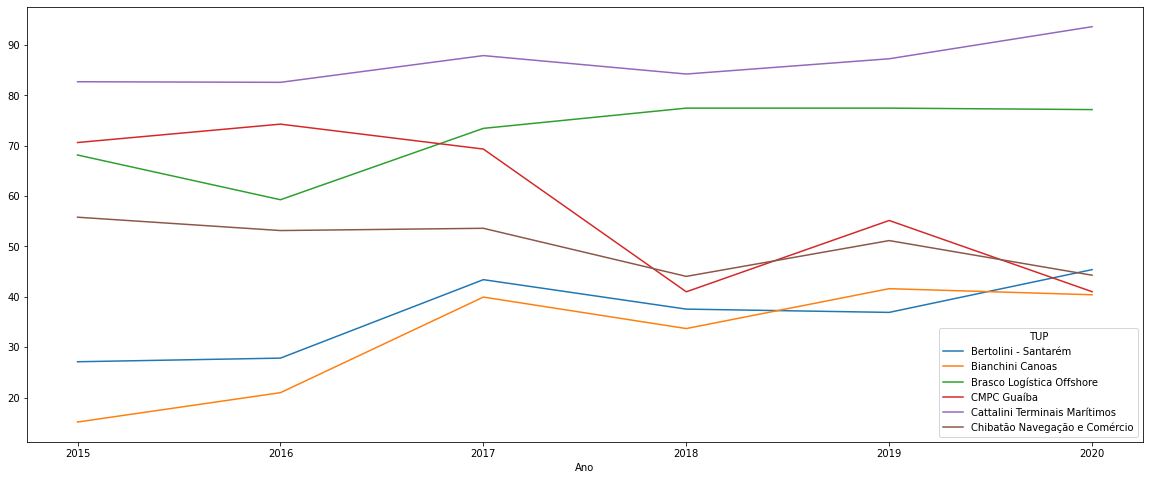

In [244]:
df_TUP_6_pivot.iloc[[0,1,2,3,4,5], [0,1,2,3,4,5]].plot(figsize=(20,8))